# Music Genre Classification
## Machine Learning 

In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
# Projects Routes
DATA_PATH = "../Data/"
OUTPUT_PATH = "../Outputs/"

In [4]:
#Visual Configuration
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

#Import dataset
df = pd.read_csv(DATA_PATH + 'features_30_sec.csv')

#Explore dataset
df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [5]:
#Shape & class balance
print("Dataset shape: ", df.shape)
print("\nClass balance (genres):")
print(df["label"].value_counts())

Dataset shape:  (1000, 60)

Class balance (genres):
label
blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: count, dtype: int64


In [6]:
#Data types & null values
print(df.info())
print("\nNull values:\n", df.isnull().sum().sort_values(ascending=False))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 60 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   filename                 1000 non-null   object 
 1   length                   1000 non-null   int64  
 2   chroma_stft_mean         1000 non-null   float64
 3   chroma_stft_var          1000 non-null   float64
 4   rms_mean                 1000 non-null   float64
 5   rms_var                  1000 non-null   float64
 6   spectral_centroid_mean   1000 non-null   float64
 7   spectral_centroid_var    1000 non-null   float64
 8   spectral_bandwidth_mean  1000 non-null   float64
 9   spectral_bandwidth_var   1000 non-null   float64
 10  rolloff_mean             1000 non-null   float64
 11  rolloff_var              1000 non-null   float64
 12  zero_crossing_rate_mean  1000 non-null   float64
 13  zero_crossing_rate_var   1000 non-null   float64
 14  harmony_mean             

In [7]:
# Descriptive Statistics
df.describe().T.head(10) 

,count,mean,std,min,25%,50%,75%,max
length,1000.0,662030.846000,1784.073992,660000.000000,661504.000000,661794.000000,661794.000000,6.758080e+05
chroma_stft_mean,1000.0,0.378682,0.081705,0.171939,0.319562,0.383148,0.435942,6.636847e-01
chroma_stft_var,1000.0,0.086340,0.007735,0.044555,0.082298,0.086615,0.091256,1.081115e-01
rms_mean,1000.0,0.130930,0.065683,0.005276,0.086657,0.122443,0.175682,3.979734e-01
rms_var,1000.0,0.003051,0.003634,0.000004,0.000942,0.001816,0.003577,2.767948e-02
spectral_centroid_mean,1000.0,2201.780898,715.960600,570.040355,1627.697311,2209.263090,2691.294667,4.435244e+03
spectral_centroid_var,1000.0,469691.574888,400899.517468,7911.251394,184350.530174,338486.152674,612147.934781,3.036843e+06
spectral_bandwidth_mean,1000.0,2242.541070,526.316473,898.066208,1907.240605,2221.392843,2578.469836,3.509646e+03
spectral_bandwidth_var,1000.0,137079.155165,96455.666326,10787.185064,67376.554428,111977.548036,182371.576801,6.947848e+05
rolloff_mean,1000.0,4571.549304,1574.791602,749.140636,3380.069642,4658.524473,5533.810460,8.677673e+03


#### EDA

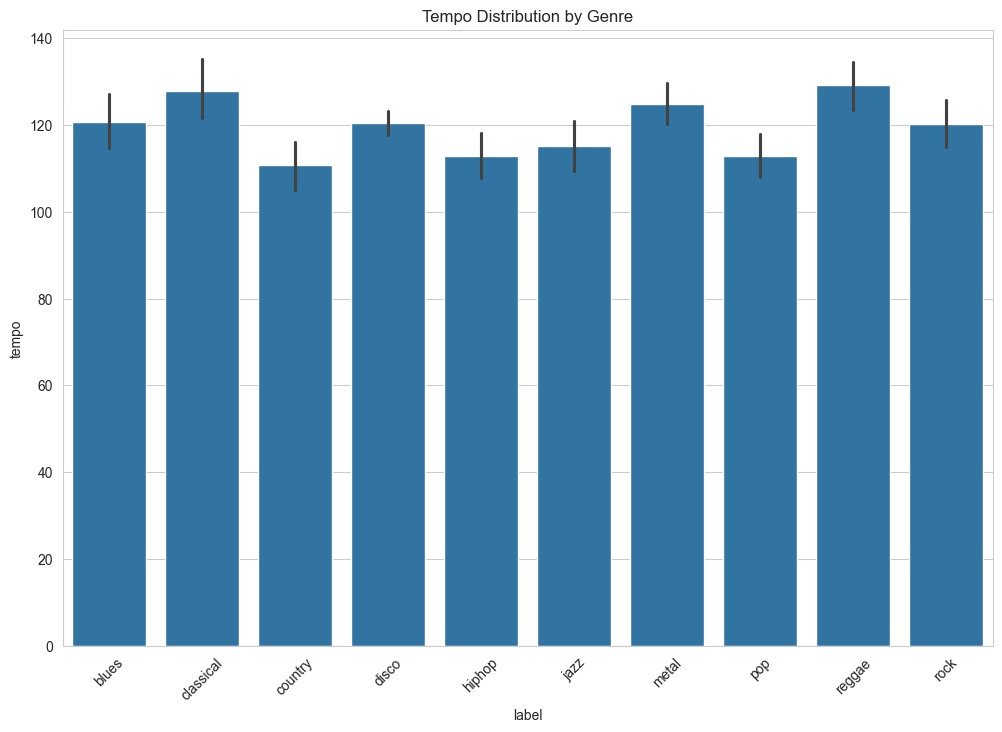

In [8]:
#Tempo Distribution

plt.figure(figsize=(12, 8))
sns.barplot(x="label", y="tempo", data=df)
plt.xticks(rotation=45)
plt.title("Tempo Distribution by Genre")
plt.show()

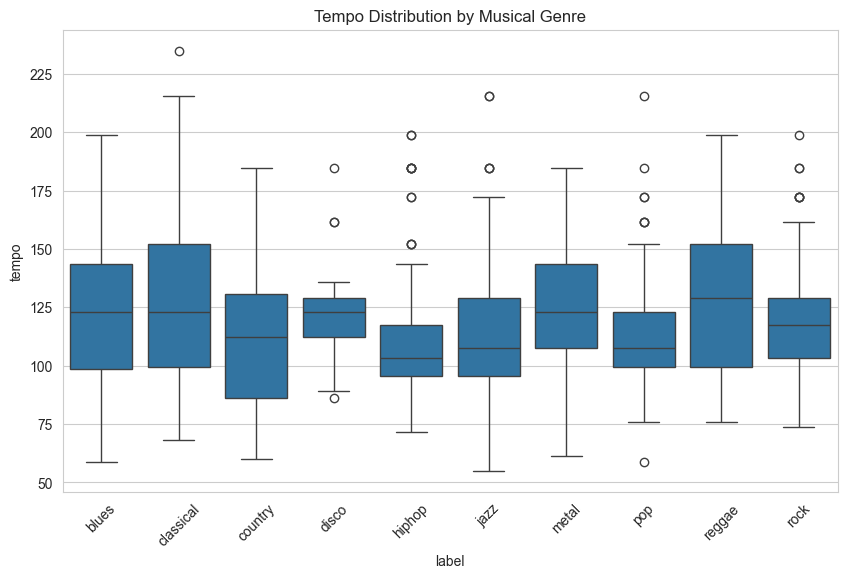

In [9]:
#Correlation
corr = df.corr(numeric_only=True)
sns.boxplot(data=df, x="label", y='tempo')
plt.xticks(rotation=45)
plt.title("Tempo Distribution by Musical Genre")
plt.show()

### Normalization of Numeric Variables

In [10]:
from sklearn.preprocessing import StandardScaler

#Exclude non-numerical columns
X = df.drop(columns =['filename', 'label'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)\

df_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_scaled['label'] = df['label']

In [11]:
#Save clean dataset for future notebooks
df_scaled.to_csv(OUTPUT_PATH +'features_clean_30sec.csv', index = False)